In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand", "Value1", "Value2", "Value3", "Label1", "Label2")

In [3]:
fdiry = file.path(FD_RES, "source", "cCREs")
fname = "ENCFF971AHO_ENCFF847JMY_ENCFF779QTH_ENCFF405AYC.7group.bed"
fpath = file.path(fdiry, fname)

dat_ccre = read_tsv(fpath, col_names = cnames)
print(dim(dat_ccre))
head(dat_ccre)

Rows: 926535 Columns: 11
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Chrom, Name, Strand, Value3, Label1, Label2
dbl (5): Start, End, Score, Value1, Value2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 926535     11


Chrom,Start,End,Name,Score,Strand,Value1,Value2,Value3,Label1,Label2
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,0,.,181251,181601,"6,218,147",DNase-only,All-data/Full-classification
chr1,190865,191071,EH38E1310154,0,.,190865,191071,"225,225,225",Low-DNase,All-data/Full-classification
chr1,778562,778912,EH38E1310158,0,.,778562,778912,"255,0,0","PLS,CTCF-bound",All-data/Full-classification
chr1,779086,779355,EH38E1310159,0,.,779086,779355,"255,0,0",PLS,All-data/Full-classification
chr1,779727,780060,EH38E1310160,0,.,779727,780060,"225,225,225",Low-DNase,All-data/Full-classification
chr1,790397,790626,EH38E1310162,0,.,790397,790626,"225,225,225",Low-DNase,All-data/Full-classification


In [4]:
dat_ccre = dat_ccre %>% dplyr::select(Chrom, Start, End, Name, Label1) %>% dplyr::rename(Label = Label1)
head(dat_ccre)

Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,DNase-only
chr1,190865,191071,EH38E1310154,Low-DNase
chr1,778562,778912,EH38E1310158,"PLS,CTCF-bound"
chr1,779086,779355,EH38E1310159,PLS
chr1,779727,780060,EH38E1310160,Low-DNase
chr1,790397,790626,EH38E1310162,Low-DNase


In [5]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_gata1 = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_gata1)

Chrom,Loc,Input,Output,FC_out00_inp01,FC_out01_inp01,FC_out10_inp10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,0,0,0,1,1
chrX,47786401,0,0,0,1,1
chrX,47786402,0,0,0,1,1
chrX,47786403,0,0,0,1,1
chrX,47786404,0,0,0,1,1
chrX,47786405,0,0,0,1,1


In [6]:
dat = dat_astarr_gata1
print(range(dat$Loc))

[1] 47786400 49786749


In [11]:
dat = dat_ccre %>% dplyr::filter(Chrom == "chrX", Start >= 47786400, End <= 49786750)

dat_ccre_gata1 = dat
print(dim(dat))
head(dat)

[1] 507   5


Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47796557,47796905,EH38E2753817,Low-DNase
chrX,47798996,47799283,EH38E2753819,Low-DNase
chrX,47802599,47802936,EH38E2753820,Low-DNase
chrX,47803145,47803428,EH38E2753821,Low-DNase
chrX,47806265,47806603,EH38E2753823,Low-DNase
chrX,47806645,47806957,EH38E2753824,Low-DNase


----

In [12]:
tmp = dat_ccre_gata1 %>% head
tmp

Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47796557,47796905,EH38E2753817,Low-DNase
chrX,47798996,47799283,EH38E2753819,Low-DNase
chrX,47802599,47802936,EH38E2753820,Low-DNase
chrX,47803145,47803428,EH38E2753821,Low-DNase
chrX,47806265,47806603,EH38E2753823,Low-DNase
chrX,47806645,47806957,EH38E2753824,Low-DNase


In [17]:
x = tmp[1,]
x["Start"]

Start
<dbl>
47796557


In [18]:
x = as.vector(tmp[1,])
x["Start"]

$Start
[1] 47796557

In [15]:
dat = dat_astarr_gata1 %>% dplyr::filter(Loc >= x["Start"], Loc <= x["End"])
xinp = mean(dat$Input)
xout = mean(dat$Output)
print(c(xinp, xout))

[1] 0.0002329681 0.0003887556


In [39]:
x = as.vector(tmp[2,])
x["Start"]

$Start
[1] 47798996

In [40]:
dat = dat_astarr_gata1 %>% dplyr::filter(Loc >= x["Start"], Loc <= x["End"])
xinp = mean(dat$Input)
xout = mean(dat$Output)
print(c(xinp, xout))

[1] 3.490303e-05 9.521122e-06


In [44]:
res = lapply(1:nrow(tmp), function(idx){
    x    = as.vector(dat_ccre_gata1[idx,])
    dat  = dat_astarr_gata1 %>% dplyr::filter(Loc >= x["Start"], Loc <= x["End"])
    
    x$Input  = mean(dat$Input)
    x$Output = mean(dat$Output)
    
    return(x)
})
res = bind_rows(res)
res

Chrom,Start,End,Name,Label,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,47796557,47796905,EH38E2753817,Low-DNase,2.329681e-04,3.887556e-04
chrX,47798996,47799283,EH38E2753819,Low-DNase,3.490303e-05,9.521122e-06
chrX,47802599,47802936,EH38E2753820,Low-DNase,1.021120e-04,8.948429e-05
chrX,47803145,47803428,EH38E2753821,Low-DNase,1.101788e-04,6.081133e-05
chrX,47806265,47806603,EH38E2753823,Low-DNase,1.891878e-04,2.575489e-04
chrX,47806645,47806957,EH38E2753824,Low-DNase,3.655550e-04,7.119706e-04


In [45]:
res = lapply(1:nrow(dat_ccre_gata1), function(idx){
    x    = as.vector(dat_ccre_gata1[idx,])
    dat  = dat_astarr_gata1 %>% dplyr::filter(Loc >= x["Start"], Loc <= x["End"])
    
    x$Input  = mean(dat$Input)
    x$Output = mean(dat$Output)
    
    return(x)
})
res = bind_rows(res)
res

Chrom,Start,End,Name,Label,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,47796557,47796905,EH38E2753817,Low-DNase,2.329681e-04,3.887556e-04
chrX,47798996,47799283,EH38E2753819,Low-DNase,3.490303e-05,9.521122e-06
chrX,47802599,47802936,EH38E2753820,Low-DNase,1.021120e-04,8.948429e-05
chrX,47803145,47803428,EH38E2753821,Low-DNase,1.101788e-04,6.081133e-05
chrX,47806265,47806603,EH38E2753823,Low-DNase,1.891878e-04,2.575489e-04
chrX,47806645,47806957,EH38E2753824,Low-DNase,3.655550e-04,7.119706e-04
chrX,47807630,47807970,EH38E2753826,Low-DNase,2.149952e-04,1.801922e-04
chrX,47814932,47815157,EH38E2753827,"CTCF-only,CTCF-bound",3.449964e-04,2.385034e-04
chrX,47815924,47816269,EH38E2753829,Low-DNase,9.198921e-05,6.245460e-05


In [53]:
print(range(res$Input))
print(range(res$Output))

[1] 1.448815e-05 5.802268e-03
[1] 4.814190e-06 1.167783e-02


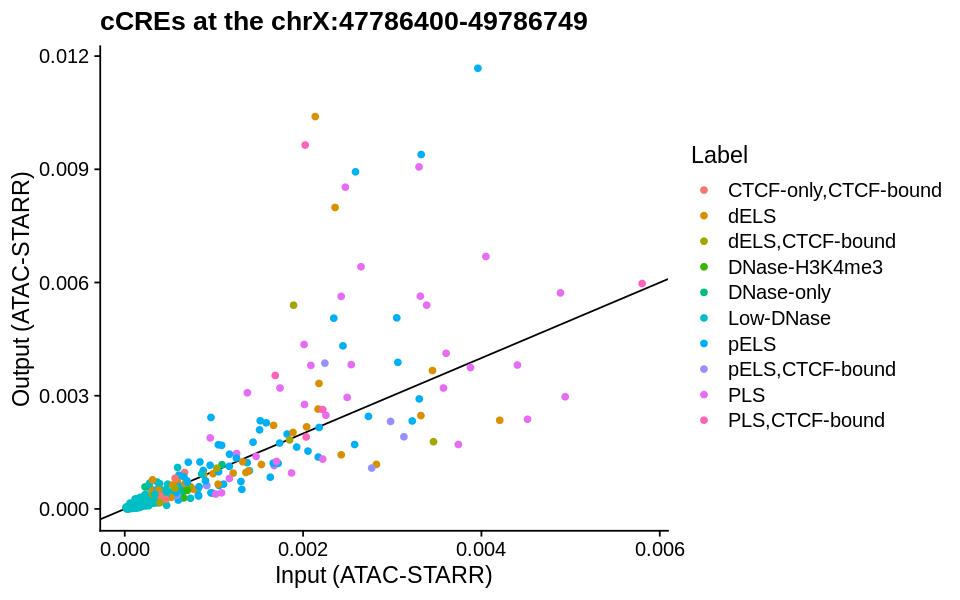

In [58]:
dat = res
gpt = ggplot(dat, aes(x=Input, y=Output, color=Label)) + 
    geom_abline(intercept = 0, slope = 1) +
    geom_point() + 
    theme_cowplot() + 
    labs(title = "cCREs at the chrX:47786400-49786749",
         x="Input (ATAC-STARR)", y = "Output (ATAC-STARR)")

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [52]:
tmp = res
tmp$FC = tmp$Output / tmp$Input
head(tmp)

Chrom,Start,End,Name,Label,Input,Output,FC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47796557,47796905,EH38E2753817,Low-DNase,2.329681e-04,3.887556e-04,1.6687075
chrX,47798996,47799283,EH38E2753819,Low-DNase,3.490303e-05,9.521122e-06,0.2727878
chrX,47802599,47802936,EH38E2753820,Low-DNase,1.021120e-04,8.948429e-05,0.8763346
chrX,47803145,47803428,EH38E2753821,Low-DNase,1.101788e-04,6.081133e-05,0.5519330
chrX,47806265,47806603,EH38E2753823,Low-DNase,1.891878e-04,2.575489e-04,1.3613399
chrX,47806645,47806957,EH38E2753824,Low-DNase,3.655550e-04,7.119706e-04,1.9476430


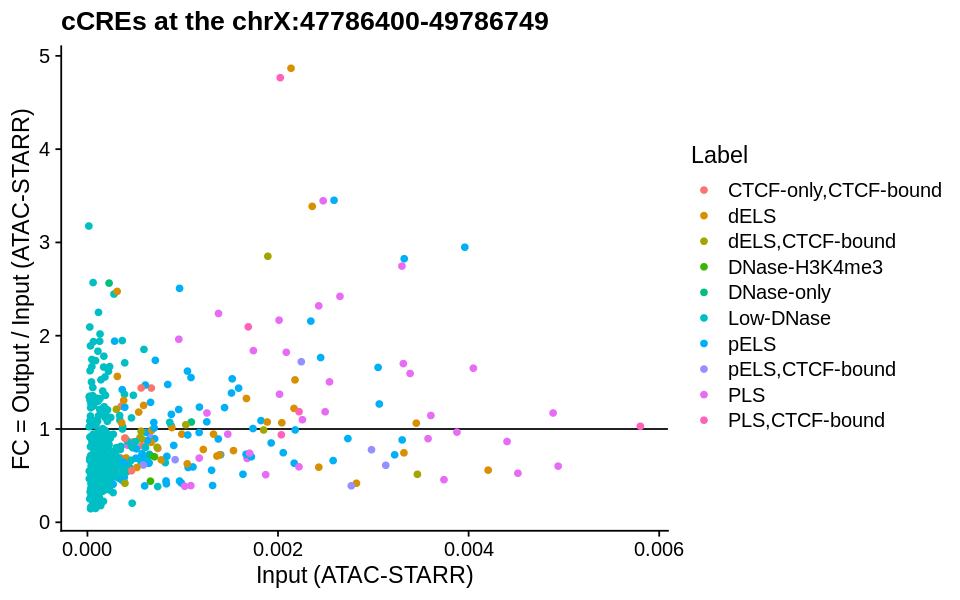

In [56]:
dat = tmp
gpt = ggplot(dat, aes(x=Input, y=FC, color=Label)) + 
    geom_hline(yintercept = 1) +
    geom_point() + 
    theme_cowplot() + 
    labs(
        title = "cCREs at the chrX:47786400-49786749",
        x = "Input (ATAC-STARR)", 
        y = "FC = Output / Input (ATAC-STARR)")

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [66]:
tmp2 = tmp %>% dplyr::filter(FC > 4)
tmp2

Chrom,Start,End,Name,Label,Input,Output,FC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,48574722,48575072,EH38E2754037,"PLS,CTCF-bound",0.002023308,0.009643147,4.766030
chrX,49148741,49149086,EH38E2754369,dELS,0.002136344,0.010397686,4.867046


In [79]:
dat = dat_astarr_gata1
dat = dat %>% dplyr::filter(Loc>=48574000, Loc<=48576000)
tmp2 = tmp %>% dplyr::filter(FC > 4)
tmp2 = tmp2[1,]

gp1 = ggplot() + 
    geom_rect(
        data = tmp2[1,], 
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf), 
        fill="red", alpha=0.5) +
    geom_point(
        data = dat, 
        aes(x=Loc, y=Input), size=1) + 
    theme_cowplot()
gp2 = ggplot() + 
    geom_rect(
        data = tmp2, 
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf), 
        fill="red", alpha=0.5) +
    geom_point(
        data = dat, aes(x=Loc, y=Output), size=1) + 
    theme_cowplot()

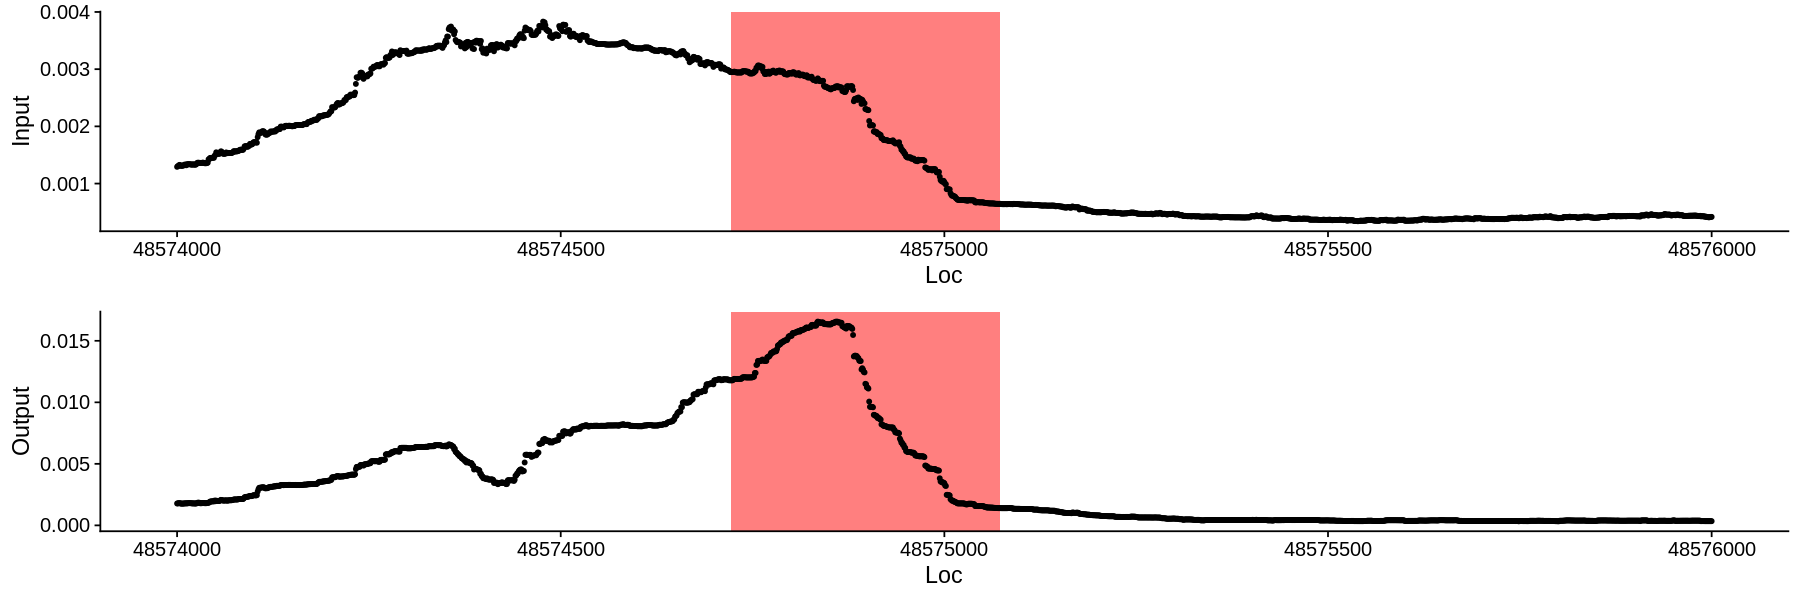

In [80]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(gp1, gp2, align="v", ncol=1)

In [ ]:
dat = dat_astarr_gata1
dat = dat %>% dplyr::filter(Loc>=48574700, Loc<=49149090)
gp1 = ggplot() + 
    geom_rect(
        data = tmp2, 
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf), 
        fill="red", alpha=0.5) +
    geom_point(
        data = dat, 
        aes(x=Loc, y=Input), size=1) + 
    theme_cowplot()
gp2 = ggplot() + 
    geom_rect(
        data = tmp2, 
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf), 
        fill="red", alpha=0.5) +
    geom_point(
        data = dat, aes(x=Loc, y=Output), size=1) + 
    theme_cowplot()

In [ ]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(gp1, gp2, align="v", ncol=1)